In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv(r'kidney_disease.csv')

In [3]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [4]:
df.shape

(400, 26)

In [5]:
df.values

array([[0, 48.0, 80.0, ..., 'no', 'no', 'ckd'],
       [1, 7.0, 50.0, ..., 'no', 'no', 'ckd'],
       [2, 62.0, 80.0, ..., 'no', 'yes', 'ckd'],
       ...,
       [397, 12.0, 80.0, ..., 'no', 'no', 'notckd'],
       [398, 17.0, 60.0, ..., 'no', 'no', 'notckd'],
       [399, 58.0, 80.0, ..., 'no', 'no', 'notckd']], dtype=object)

In [6]:
columns = pd.read_csv(r'data_description.txt',sep='-')

In [7]:
columns = columns.reset_index()
columns

index             1. Features:
0               id                        id
1              age                       age
2               bp            blood_pressure
3               sg          specific_gravity
4               al                   albumin
5               su                     sugar
6              rbc           red_blood_cells
7               pc                  pus_cell
8              pcc           pus_cell_clumps
9               ba                  bacteria
10             bgr      blood_glucose_random
11              bu                blood_urea
12              sc          serum_creatinine
13             sod                    sodium
14             pot                 potassium
15            hemo               haemoglobin
16             pcv        packed_cell_volume
17              wc    white_blood_cell_count
18              rc      red_blood_cell_count
19             htn               ypertension
20              dm         diabetes_mellitus
21             cad   coronary_artery_disease
22           appet                  appetite
23              pe               pedal_edema
24             ane                    anemia
25  classification                     class

In [8]:
columns.columns=['Cols','Change_Col']
columns

Cols               Change_Col
0               id                        id
1              age                       age
2               bp            blood_pressure
3               sg          specific_gravity
4               al                   albumin
5               su                     sugar
6              rbc           red_blood_cells
7               pc                  pus_cell
8              pcc           pus_cell_clumps
9               ba                  bacteria
10             bgr      blood_glucose_random
11              bu                blood_urea
12              sc          serum_creatinine
13             sod                    sodium
14             pot                 potassium
15            hemo               haemoglobin
16             pcv        packed_cell_volume
17              wc    white_blood_cell_count
18              rc      red_blood_cell_count
19             htn               ypertension
20              dm         diabetes_mellitus
21             cad   coronary_artery_disease
22           appet                  appetite
23              pe               pedal_edema
24             ane                    anemia
25  classification                     class

# Renaming the Column name 

In [9]:
df.columns = columns['Change_Col'].values

In [10]:
df.dtypes

id                           int64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
 pus_cell                   object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
ypertension                 object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
class                       object
dtype: object

# Function to convert object data type into numeric  

In [11]:
def convert_into_numeric(df,features):
    df[features] = pd.to_numeric(df[features],errors='coerce')

In [12]:
features = ['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']

In [13]:
for feature in features:
    convert_into_numeric(df,feature)

In [14]:
df.dtypes

id                           int64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
 pus_cell                   object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
ypertension                 object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
class                       object
dtype: object

# Removing useless Columns

In [15]:
df.drop('id',axis= 1 ,inplace= True)

In [16]:
df

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0             NaN   
1     7.0            50.0             1.020      4.0    0.0             NaN   
2    62.0            80.0             1.010      2.0    3.0          normal   
3    48.0            70.0             1.005      4.0    0.0          normal   
4    51.0            80.0             1.010      2.0    0.0          normal   
..    ...             ...               ...      ...    ...             ...   
395  55.0            80.0             1.020      0.0    0.0          normal   
396  42.0            70.0             1.025      0.0    0.0          normal   
397  12.0            80.0             1.020      0.0    0.0          normal   
398  17.0            60.0             1.025      0.0    0.0          normal   
399  58.0            80.0             1.025      0.0    0.0          normal   

     pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0      normal      notpresent  notpresent                 121.0  ...   
1      normal      notpresent  notpresent                   NaN  ...   
2      normal      notpresent  notpresent                 423.0  ...   
3    abnormal         present  notpresent                 117.0  ...   
4      normal      notpresent  notpresent                 106.0  ...   
..        ...             ...         ...                   ...  ...   
395    normal      notpresent  notpresent                 140.0  ...   
396    normal      notpresent  notpresent                  75.0  ...   
397    normal      notpresent  notpresent                 100.0  ...   
398    normal      notpresent  notpresent                 114.0  ...   
399    normal      notpresent  notpresent                 131.0  ...   

     packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44.0                  7800.0                   5.2   
1                  38.0                  6000.0                   NaN   
2                  31.0                  7500.0                   NaN   
3                  32.0                  6700.0                   3.9   
4                  35.0                  7300.0                   4.6   
..                  ...                     ...                   ...   
395                47.0                  6700.0                   4.9   
396                54.0                  7800.0                   6.2   
397                49.0                  6600.0                   5.4   
398                51.0                  7200.0                   5.9   
399                53.0                  6800.0                   6.1   

     ypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0            yes                yes                       no      good   
1             no                 no                       no      good   
2             no                yes                       no      poor   
3            yes                 no                       no      poor   
4             no                 no                       no      good   
..           ...                ...                      ...       ...   
395           no                 no                       no      good   
396           no                 no                       no      good   
397           no                 no                       no      good   
398           no                 no                       no      good   
399           no                 no                       no      good   

     pedal_edema anemia   class  
0             no     no     ckd  
1             no     no     ckd  
2             no    yes     ckd  
3            yes    yes     ckd  
4             no     no     ckd  
..           ...    ...     ...  
395           no     no  notckd  
396           no     no  notckd  
397           no     no  notckd  
398           no     no  notckd  
399           no     no  notckd  

[400 rows x 25 co

# List comprehension

In [17]:
def extract_cat_num(df):
    categorical_column = [col for col in df.columns if df[col].dtypes == 'object' ]
    numerical_column = [col for col in df.columns if df[col].dtypes != 'object']
    return categorical_column, numerical_column

In [18]:
categorical_column  , numerical_column = extract_cat_num(df)

In [19]:
categorical_column , numerical_column

(['red_blood_cells',
  ' pus_cell',
  'pus_cell_clumps',
  'bacteria',
  'ypertension',
  'diabetes_mellitus',
  'coronary_artery_disease',
  'appetite',
  'pedal_edema',
  'anemia',
  'class'],
 ['age',
  'blood_pressure',
  'specific_gravity',
  'albumin',
  'sugar',
  'blood_glucose_random',
  'blood_urea',
  'serum_creatinine',
  'sodium',
  'potassium',
  'haemoglobin',
  'packed_cell_volume',
  'white_blood_cell_count',
  'red_blood_cell_count'])

In [20]:
for col in categorical_column:
    print("{} has {} values".format(col,df[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values


 pus_cell has ['normal' 'abnormal' nan] values


pus_cell_clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary_artery_disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal_edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




In [21]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes'},inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['class'] = df['class'].replace(to_replace ='ckd\t',value = 'ckd')

In [22]:
for col in categorical_column:
    print("{} has {} values".format(col,df[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values


 pus_cell has ['normal' 'abnormal' nan] values


pus_cell_clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes_mellitus has ['yes' 'no' ' yes' nan] values


coronary_artery_disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal_edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




In [23]:
df[categorical_column].head()

red_blood_cells  pus_cell pus_cell_clumps    bacteria ypertension  \
0             NaN    normal      notpresent  notpresent         yes   
1             NaN    normal      notpresent  notpresent          no   
2          normal    normal      notpresent  notpresent          no   
3          normal  abnormal         present  notpresent         yes   
4          normal    normal      notpresent  notpresent          no   

  diabetes_mellitus coronary_artery_disease appetite pedal_edema anemia class  
0               yes                      no     good          no     no   ckd  
1                no                      no     good          no     no   ckd  
2               yes                      no     poor          no    yes   ckd  
3                no                      no     poor         yes    yes   ckd  
4                no                      no     good          no     no   ckd

# Data Visualization 

In [24]:
len(df.values)

400

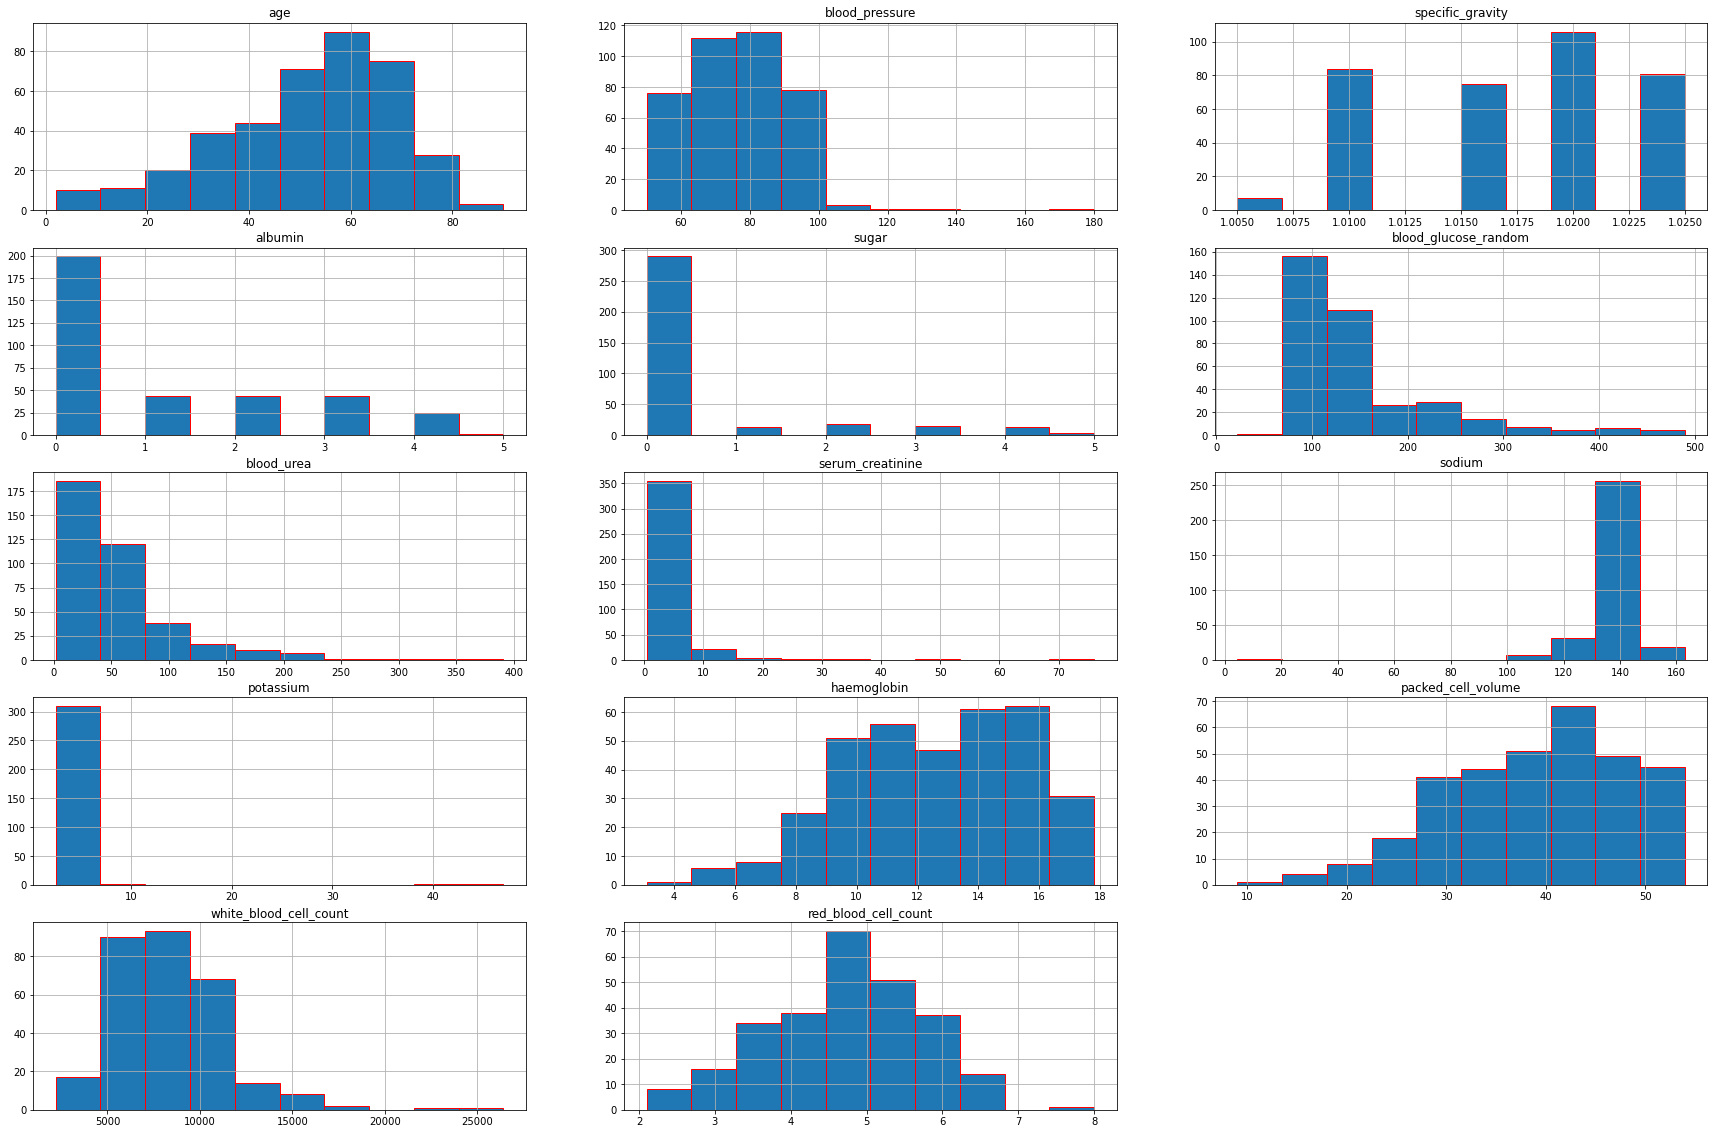

In [25]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(numerical_column):
    plt.subplot(5,3,i + 1)
    df[feature].hist(edgecolor='red')
    plt.title(feature)

# Heatmap

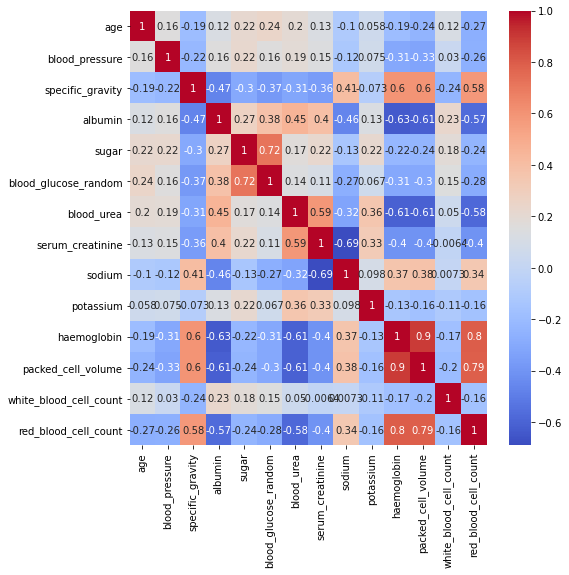

In [26]:
plt.figure(figsize=(8,8))
sn.heatmap(df[numerical_column].corr(),cmap='coolwarm',annot=True)
plt.show()

# Pairplot

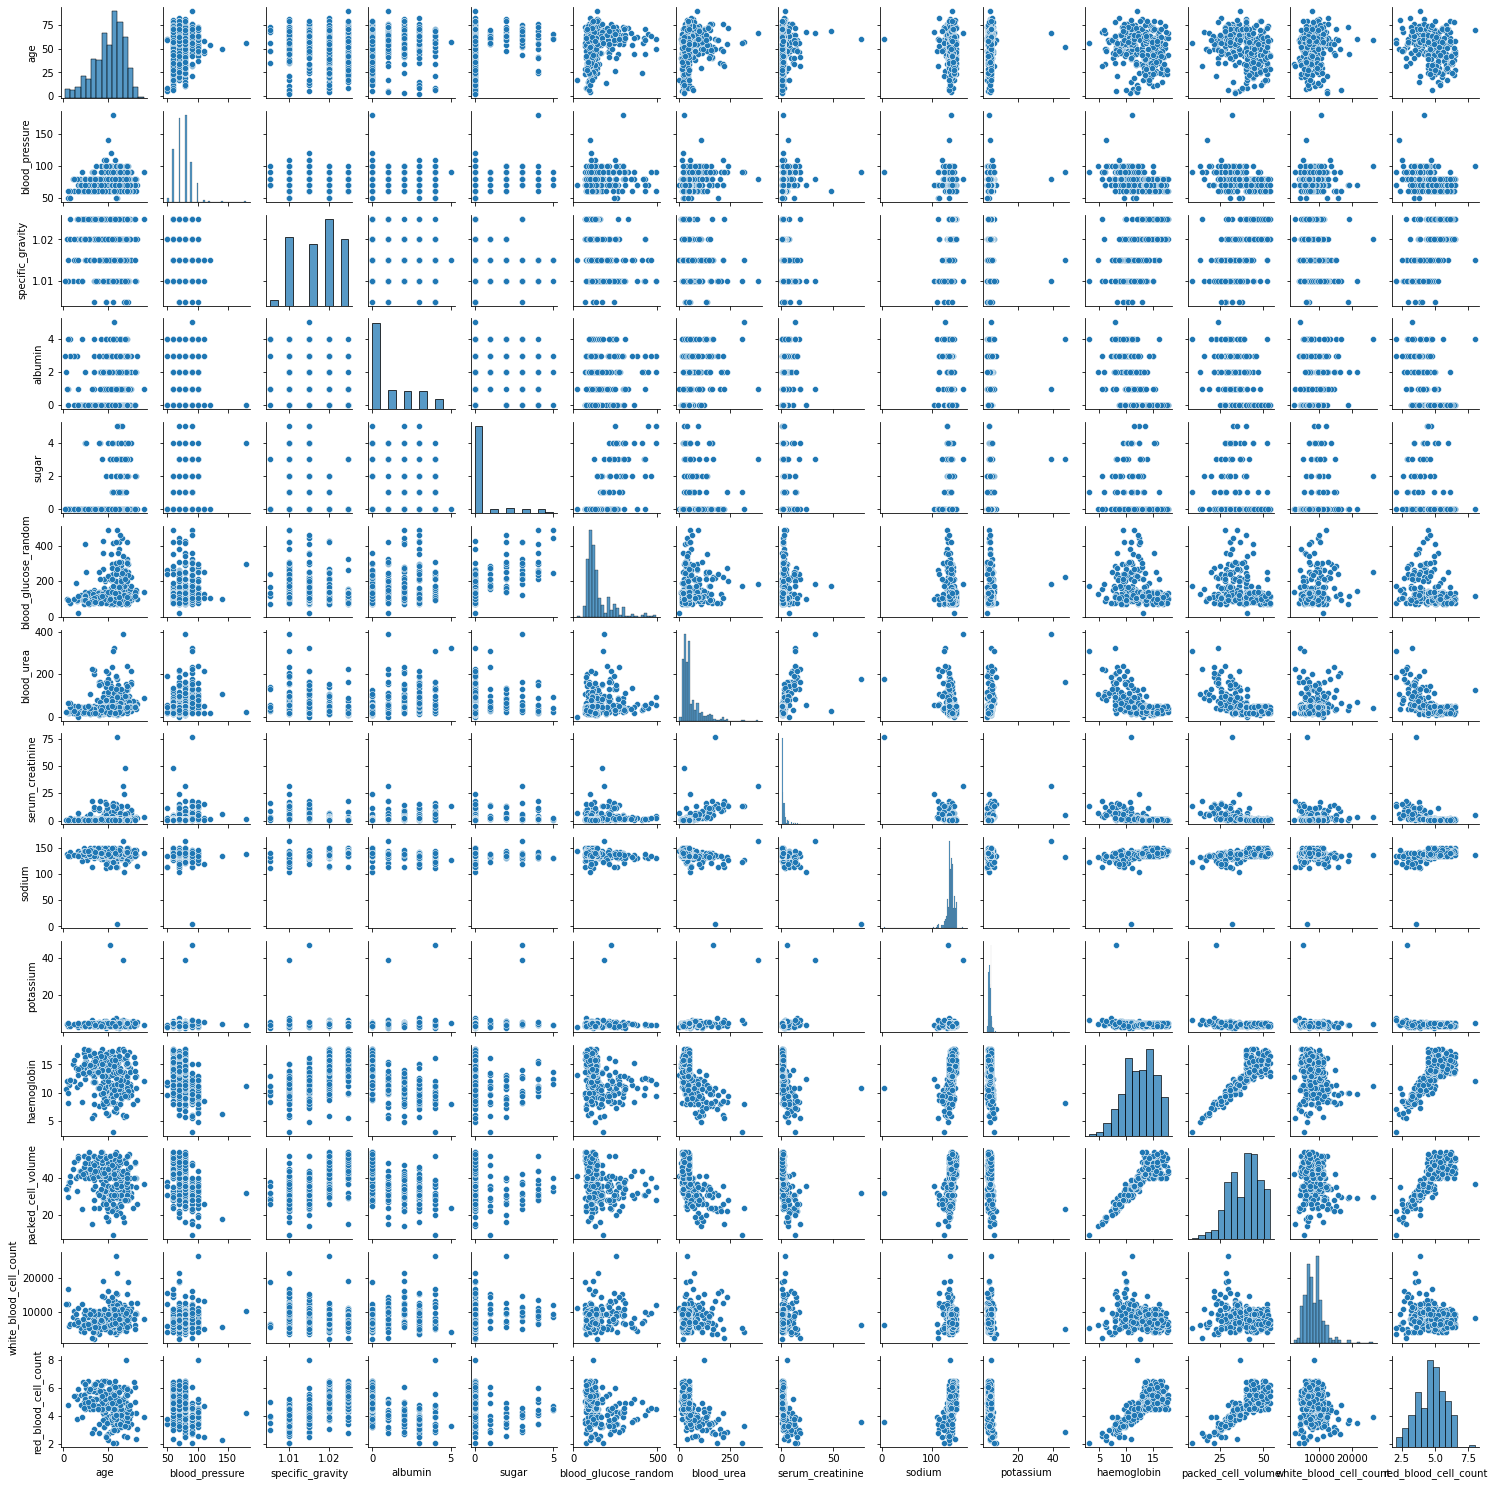

In [27]:
df.dropna()
sn.pairplot(df[numerical_column],height=1.5)

# Line Chart

No handles with labels found to put in legend.


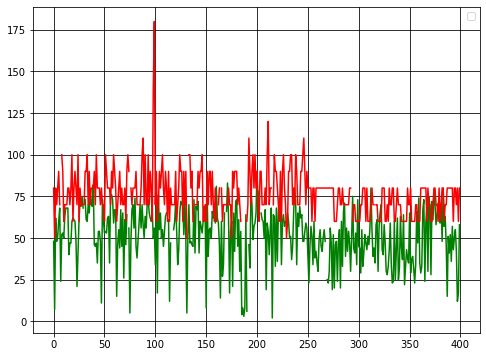

In [28]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
plt.plot(df.age,color = 'green' )
plt.plot(df.blood_pressure,color = 'red')
#plt.ylim(0,80)
plt.yticks()
plt.grid(color = 'black')
plt.legend();

# Bar plot


<BarContainer object of 400 artists>

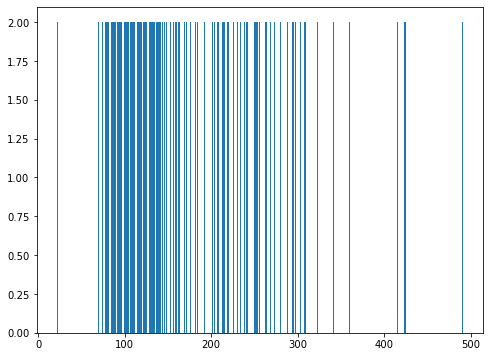

In [29]:
plt.bar(df.blood_glucose_random,height= 2)

# Scatter Plot

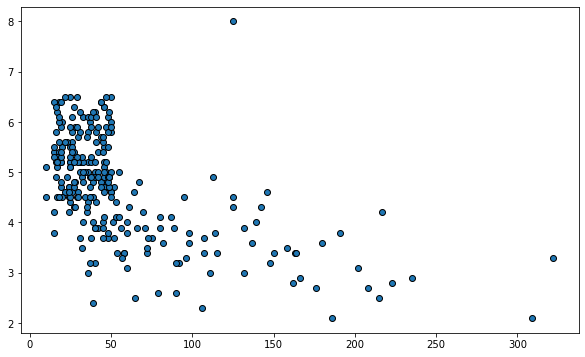

In [30]:
rcParams['figure.figsize'] = 10,6
#plt.axvline(0,c = (.5,.5,.5), ls = '--')
#plt.axhline(0, c = (.5,.5,.5), ls = '--')
#plt.style.use('seaborn')
#plt.colorbar()
#plt.ylim(-0.5,0.5)
#plt.xlim(-0.5,0.5)
plt.scatter(df.blood_urea,df.red_blood_cell_count,edgecolors='k')

# Label Distribution

In [31]:
#plt.figure(figsize=(20,20))
#for i, feature in enumerate(categorical_column):
  #  plt.subplot(4,3,i + 1)
   # sn.countplot(df[feature])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

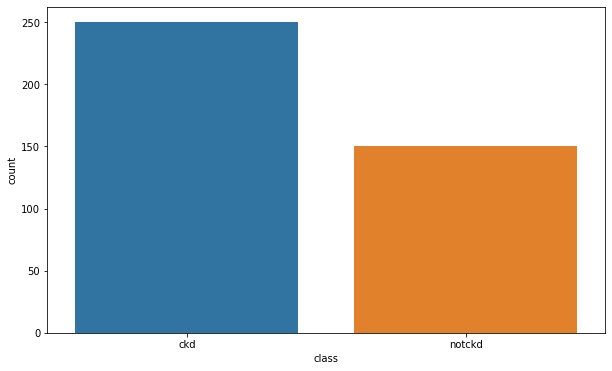

In [32]:
sn.countplot(df['class'])

<AxesSubplot:>

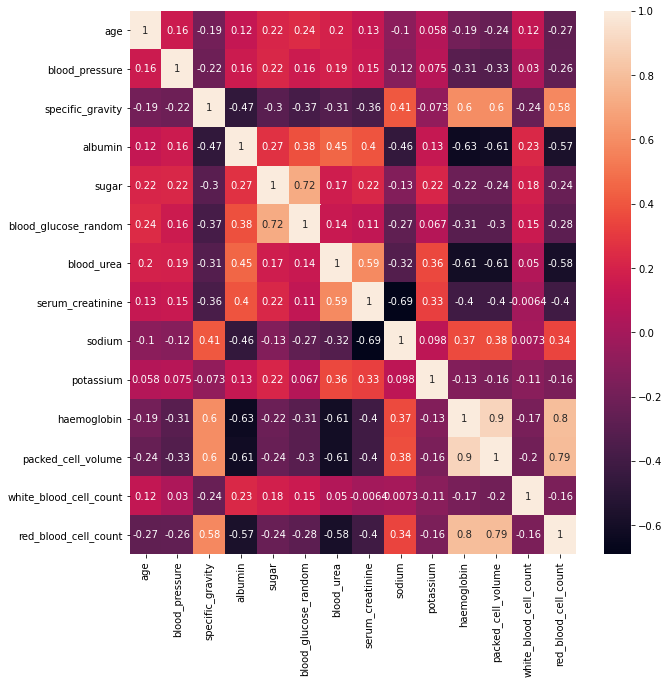

In [33]:
plt.figure(figsize =(10,10))  
df.corr()
sn.heatmap(df.corr(),annot=True)

In [34]:
df.groupby(['red_blood_cells','class'])['red_blood_cell_count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red_blood_cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [35]:
import plotly.express as px

In [36]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', ' pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'ypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

# Violin Plot 

In [37]:
px.violin(df ,y = 'red_blood_cell_count',x = 'class',color = 'class')

In [38]:
px.scatter(df,x = 'haemoglobin',y= 'packed_cell_volume')

# FacetGrid

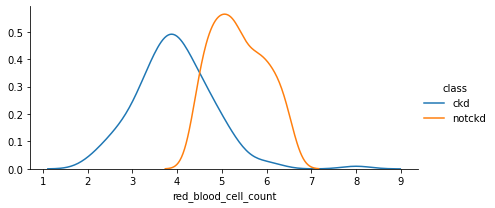

In [39]:
rcParams['figure.figsize'] = 15,8
grid = sn.FacetGrid(df,hue= 'class',aspect= 2)
grid.map(sn.kdeplot,'red_blood_cell_count')
grid.add_legend()

# Automate Analysis

In [40]:
def voilen_plot(col):
    fig = px.violin(df,y= col,x = 'class',color = 'class',box = True)
    return fig.show()

In [41]:
def scatter_plot(col1,col2):
    fig = px.scatter(df,x = col1,y = col2,color = 'class')
    return fig.show()

In [42]:
def kd_plot(feature):
    grid = sn.FacetGrid(df,hue= 'class',aspect= 2)
    grid.map(sn.kdeplot,feature)
    grid.add_legend()
    

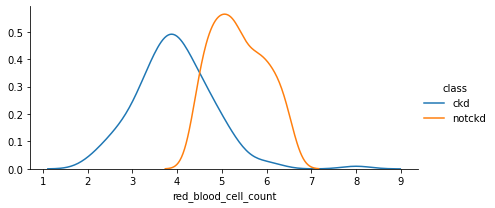

In [43]:
kd_plot('red_blood_cell_count')

In [44]:
voilen_plot('red_blood_cell_count')

# Perform Exploratory Data Analysis on data

In [45]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', ' pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'ypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

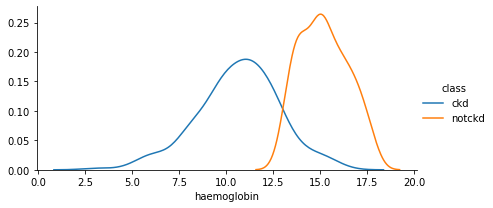

In [46]:
kd_plot('haemoglobin')

In [47]:
scatter_plot('red_blood_cell_count','packed_cell_volume')

In [48]:
scatter_plot('packed_cell_volume','haemoglobin')

In [49]:
scatter_plot('albumin','haemoglobin')

# Perform Data Cleaning and Checking missing values

In [50]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
 pus_cell                   65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
ypertension                  2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

# Fill missing with random values

In [51]:
data  = df

In [52]:
data

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0             NaN   
1     7.0            50.0             1.020      4.0    0.0             NaN   
2    62.0            80.0             1.010      2.0    3.0          normal   
3    48.0            70.0             1.005      4.0    0.0          normal   
4    51.0            80.0             1.010      2.0    0.0          normal   
..    ...             ...               ...      ...    ...             ...   
395  55.0            80.0             1.020      0.0    0.0          normal   
396  42.0            70.0             1.025      0.0    0.0          normal   
397  12.0            80.0             1.020      0.0    0.0          normal   
398  17.0            60.0             1.025      0.0    0.0          normal   
399  58.0            80.0             1.025      0.0    0.0          normal   

     pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0      normal      notpresent  notpresent                 121.0  ...   
1      normal      notpresent  notpresent                   NaN  ...   
2      normal      notpresent  notpresent                 423.0  ...   
3    abnormal         present  notpresent                 117.0  ...   
4      normal      notpresent  notpresent                 106.0  ...   
..        ...             ...         ...                   ...  ...   
395    normal      notpresent  notpresent                 140.0  ...   
396    normal      notpresent  notpresent                  75.0  ...   
397    normal      notpresent  notpresent                 100.0  ...   
398    normal      notpresent  notpresent                 114.0  ...   
399    normal      notpresent  notpresent                 131.0  ...   

     packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44.0                  7800.0                   5.2   
1                  38.0                  6000.0                   NaN   
2                  31.0                  7500.0                   NaN   
3                  32.0                  6700.0                   3.9   
4                  35.0                  7300.0                   4.6   
..                  ...                     ...                   ...   
395                47.0                  6700.0                   4.9   
396                54.0                  7800.0                   6.2   
397                49.0                  6600.0                   5.4   
398                51.0                  7200.0                   5.9   
399                53.0                  6800.0                   6.1   

     ypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0            yes                yes                       no      good   
1             no                 no                       no      good   
2             no                yes                       no      poor   
3            yes                 no                       no      poor   
4             no                 no                       no      good   
..           ...                ...                      ...       ...   
395           no                 no                       no      good   
396           no                 no                       no      good   
397           no                 no                       no      good   
398           no                 no                       no      good   
399           no                 no                       no      good   

     pedal_edema anemia   class  
0             no     no     ckd  
1             no     no     ckd  
2             no    yes     ckd  
3            yes    yes     ckd  
4             no     no     ckd  
..           ...    ...     ...  
395           no     no  notckd  
396           no     no  notckd  
397           no     no  notckd  
398           no     no  notckd  
399           no     no  notckd  

[400 rows x 25 co

In [53]:
data['red_blood_cells'].isnull().sum()

152

In [54]:
random_sample = data['red_blood_cells'].dropna().sample(data['red_blood_cells'].isnull().sum())

In [55]:
random_sample.index

Int64Index([ 92,   8, 146, 251, 157,  56, 352,  38, 353, 384,
            ...
            396, 362, 314,  83, 356, 369, 374,  73, 196, 195],
           dtype='int64', length=152)

In [56]:
data[data['red_blood_cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [57]:
random_sample.index = data[data['red_blood_cells'].isnull()].index

In [58]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [59]:
data.loc[data['red_blood_cells'].isnull(),'red_blood_cells'] = random_sample

In [60]:
data.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0          normal   
1   7.0            50.0             1.020      4.0    0.0          normal   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   ypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0          yes                yes                       no      good   
1           no                 no                       no      good   
2           no                yes                       no      poor   
3          yes                 no                       no      poor   
4           no                 no                       no      good   

   pedal_edema anemia class  
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  
3          yes    yes   ckd  
4           no     no   ckd  

[5 rows x 25 columns]

In [61]:
data['red_blood_cells'].isnull().sum()

0

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='red_blood_cells', ylabel='count'>

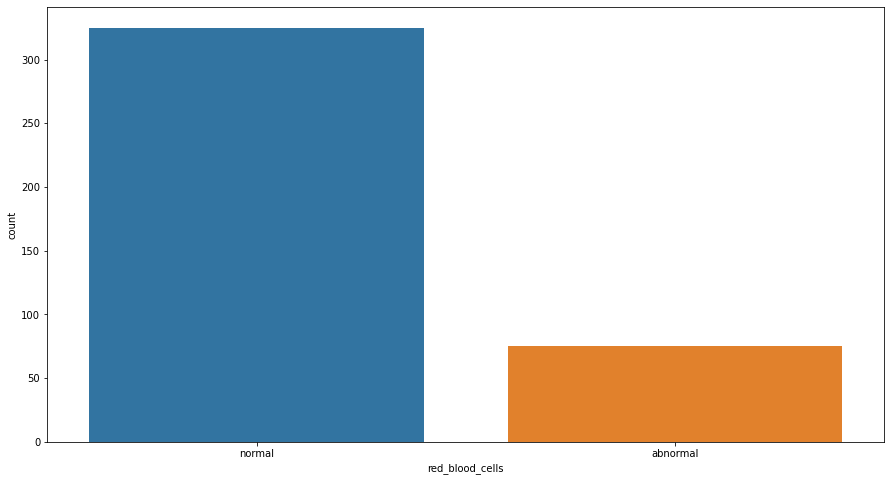

In [62]:
sn.countplot(data['red_blood_cells'])

# Function to compromise missing columns

In [63]:
def random_value_imputation(feature):
    random_sample = data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature] = random_sample

# Checking missing values in catagorical and numerical 

In [64]:
data[numerical_column].isnull().sum()


age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [65]:
for col in numerical_column:
    random_value_imputation(col)

In [66]:
data[numerical_column].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [67]:
data[categorical_column].isnull().sum()

red_blood_cells             0
 pus_cell                  65
pus_cell_clumps             4
bacteria                    4
ypertension                 2
diabetes_mellitus           2
coronary_artery_disease     2
appetite                    1
pedal_edema                 1
anemia                      1
class                       0
dtype: int64

In [68]:
random_value_imputation(' pus_cell')
#categorical_column

In [69]:
data[categorical_column].isnull().sum()

red_blood_cells            0
 pus_cell                  0
pus_cell_clumps            4
bacteria                   4
ypertension                2
diabetes_mellitus          2
coronary_artery_disease    2
appetite                   1
pedal_edema                1
anemia                     1
class                      0
dtype: int64

In [70]:
data['pus_cell_clumps'].mode()

0    notpresent
Name: pus_cell_clumps, dtype: object

In [71]:
def imput_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)

In [72]:
for col in categorical_column:
    imput_mode(col)

In [73]:
data[categorical_column].isnull().sum()

red_blood_cells            0
 pus_cell                  0
pus_cell_clumps            0
bacteria                   0
ypertension                0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

# Encoding on data

In [74]:
for col in categorical_column:
    print('{} has {} catagories'.format(col,data[col].nunique()))

red_blood_cells has 2 catagories
 pus_cell has 2 catagories
pus_cell_clumps has 2 catagories
bacteria has 2 catagories
ypertension has 2 catagories
diabetes_mellitus has 3 catagories
coronary_artery_disease has 2 catagories
appetite has 2 catagories
pedal_edema has 2 catagories
anemia has 2 catagories
class has 2 catagories


# Label Encoding 
    # normal == 0
    # abnormal == 1

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()

In [77]:
for col in categorical_column:
    data[col] = le.fit_transform(data[col])

In [78]:
data.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

    pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0          1                0         0                 121.0  ...   
1          1                0         0                 360.0  ...   
2          1                0         0                 423.0  ...   
3          0                1         0                 117.0  ...   
4          1                0         0                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   2.8   
2                31.0                  7500.0                   3.7   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   ypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0            1                  2                        0         0   
1            0                  1                        0         0   
2            0                  2                        0         1   
3            1                  1                        0         1   
4            0                  1                        0         0   

   pedal_edema  anemia  class  
0            0       0      0  
1            0       0      0  
2            0       1      0  
3            1       1      0  
4            0       0      0  

[5 rows x 25 columns]

# Select best features for your model

In [79]:
from sklearn.feature_selection import SelectKBest
# Checking wheather probability value is less than 0.5
from sklearn.feature_selection import chi2

In [80]:
ind_col =[col for col in data.columns if col != 'class']
depn_col = 'class'

In [81]:
X = data[ind_col]
y = data[depn_col]

In [82]:
X.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

    pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0          1                0         0                 121.0  ...   
1          1                0         0                 360.0  ...   
2          1                0         0                 423.0  ...   
3          0                1         0                 117.0  ...   
4          1                0         0                 106.0  ...   

   haemoglobin  packed_cell_volume  white_blood_cell_count  \
0         15.4                44.0                  7800.0   
1         11.3                38.0                  6000.0   
2          9.6                31.0                  7500.0   
3         11.2                32.0                  6700.0   
4         11.6                35.0                  7300.0   

   red_blood_cell_count  ypertension  diabetes_mellitus  \
0                   5.2            1                  2   
1                   2.8            0                  1   
2                   3.7            0                  2   
3                   3.9            1                  1   
4                   4.6            0                  1   

   coronary_artery_disease  appetite  pedal_edema  anemia  
0                        0         0            0       0  
1                        0         0            0       0  
2                        0         1            0       1  
3                        0         1            1       1  
4                        0         0            0       0  

[5 rows x 24 columns]

In [83]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [84]:
order_rank_feature = SelectKBest(score_func= chi2,k=20)
order_feature = order_rank_feature.fit(X,y)

In [85]:
order_feature

SelectKBest(k=20, score_func=<function chi2 at 0x000001B275403670>)

In [86]:
order_feature.scores_

array([1.22297574e+02, 8.45320701e+01, 5.74117030e-03, 2.23511165e+02,
       1.04003175e+02, 8.28738462e+00, 1.32696391e+01, 2.52000000e+01,
       1.32000000e+01, 2.38461917e+03, 2.30911744e+03, 3.58597505e+02,
       3.18176198e+01, 2.81658480e+00, 1.24759040e+02, 3.37459848e+02,
       1.40945976e+04, 2.21604356e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [87]:
data_scores = pd.DataFrame(order_feature.scores_,columns=['Scores'])

In [88]:
data_scores

Scores
0     122.297574
1      84.532070
2       0.005741
3     223.511165
4     104.003175
5       8.287385
6      13.269639
7      25.200000
8      13.200000
9    2384.619173
10   2309.117442
11    358.597505
12     31.817620
13      2.816585
14    124.759040
15    337.459848
16  14094.597557
17     22.160436
18     88.200000
19     20.439252
20     20.400000
21     49.200000
22     45.600000
23     36.000000

In [89]:
X.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', ' pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'ypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia'],
      dtype='object')

In [90]:
df_cols = pd.DataFrame(X.columns)

In [91]:
feature_rank = pd.concat([df_cols,data_scores],axis= 1)

In [92]:
feature_rank

0        Scores
0                       age    122.297574
1            blood_pressure     84.532070
2          specific_gravity      0.005741
3                   albumin    223.511165
4                     sugar    104.003175
5           red_blood_cells      8.287385
6                  pus_cell     13.269639
7           pus_cell_clumps     25.200000
8                  bacteria     13.200000
9      blood_glucose_random   2384.619173
10               blood_urea   2309.117442
11         serum_creatinine    358.597505
12                   sodium     31.817620
13                potassium      2.816585
14              haemoglobin    124.759040
15       packed_cell_volume    337.459848
16   white_blood_cell_count  14094.597557
17     red_blood_cell_count     22.160436
18              ypertension     88.200000
19        diabetes_mellitus     20.439252
20  coronary_artery_disease     20.400000
21                 appetite     49.200000
22              pedal_edema     45.600000
23                   anemia     36.000000

In [93]:
feature_rank.columns = ['features','Scores']
feature_rank

features        Scores
0                       age    122.297574
1            blood_pressure     84.532070
2          specific_gravity      0.005741
3                   albumin    223.511165
4                     sugar    104.003175
5           red_blood_cells      8.287385
6                  pus_cell     13.269639
7           pus_cell_clumps     25.200000
8                  bacteria     13.200000
9      blood_glucose_random   2384.619173
10               blood_urea   2309.117442
11         serum_creatinine    358.597505
12                   sodium     31.817620
13                potassium      2.816585
14              haemoglobin    124.759040
15       packed_cell_volume    337.459848
16   white_blood_cell_count  14094.597557
17     red_blood_cell_count     22.160436
18              ypertension     88.200000
19        diabetes_mellitus     20.439252
20  coronary_artery_disease     20.400000
21                 appetite     49.200000
22              pedal_edema     45.600000
23                   anemia     36.000000

In [94]:
feature_rank.nlargest(10,'Scores')

features        Scores
16  white_blood_cell_count  14094.597557
9     blood_glucose_random   2384.619173
10              blood_urea   2309.117442
11        serum_creatinine    358.597505
15      packed_cell_volume    337.459848
3                  albumin    223.511165
14             haemoglobin    124.759040
0                      age    122.297574
4                    sugar    104.003175
18             ypertension     88.200000

In [95]:
selected_columns = feature_rank.nlargest(10,'Scores')['features'].values

In [96]:
selected_columns

array(['white_blood_cell_count', 'blood_glucose_random', 'blood_urea',
       'serum_creatinine', 'packed_cell_volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [97]:
X_new = data[selected_columns]

In [98]:
X_new

white_blood_cell_count  blood_glucose_random  blood_urea  \
0                    7800.0                 121.0        36.0   
1                    6000.0                 360.0        18.0   
2                    7500.0                 423.0        53.0   
3                    6700.0                 117.0        56.0   
4                    7300.0                 106.0        26.0   
..                      ...                   ...         ...   
395                  6700.0                 140.0        49.0   
396                  7800.0                  75.0        31.0   
397                  6600.0                 100.0        26.0   
398                  7200.0                 114.0        50.0   
399                  6800.0                 131.0        18.0   

     serum_creatinine  packed_cell_volume  albumin  haemoglobin   age  sugar  \
0                 1.2                44.0      1.0         15.4  48.0    0.0   
1                 0.8                38.0      4.0         11.3   7.0    0.0   
2                 1.8                31.0      2.0          9.6  62.0    3.0   
3                 3.8                32.0      4.0         11.2  48.0    0.0   
4                 1.4                35.0      2.0         11.6  51.0    0.0   
..                ...                 ...      ...          ...   ...    ...   
395               0.5                47.0      0.0         15.7  55.0    0.0   
396               1.2                54.0      0.0         16.5  42.0    0.0   
397               0.6                49.0      0.0         15.8  12.0    0.0   
398               1.0                51.0      0.0         14.2  17.0    0.0   
399               1.1                53.0      0.0         15.8  58.0    0.0   

     ypertension  
0              1  
1              0  
2              0  
3              1  
4              0  
..           ...  
395            0  
396            0  
397            0  
398            0  
399            0  

[400 rows x 10 columns]

In [99]:
len(X_new)

400

In [100]:
X_new.shape

(400, 10)

# Building a Cross-validated Model & Checking its Accuracy

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,random_state = 0, test_size = 0.25)

In [103]:
print(X_train.shape)

(300, 10)


In [104]:
print(X_test.shape)

(100, 10)


In [105]:
y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

In [106]:
from xgboost import XGBClassifier

D:\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [107]:
param = {
    'learning_rate'    :[0.05, 0.20, 0.25 ],
    'max_depth'        :[5, 8, 10, 12],
    'min_child_weight' :[1, 3, 5, 7],
    'gamma'            :[ 0.0, 0.1, 0.2 , 0.4],
    'colsample_bytree' :[ 0.3, 0.4, 0.7 ] 
} 

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
from xgboost import XGBClassifier
classifier = XGBClassifier()

In [110]:
rand_search = RandomizedSearchCV(classifier, param_distributions=param, n_iter=5, scoring= 'roc_auc', n_jobs=1, cv=5, verbose= 3 )

In [111]:
rand_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[21:18:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.975, total=   0.1s
[CV] min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[21:18:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False wh

[CV]  min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.999, total=   0.1s
[CV] min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[21:18:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.990, total=   0.1s
[CV] min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[21:18:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.1, colsam

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers s


[21:18:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, score=0.982, total=   0.1s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[21:18:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, score=0.999, total=   0.1s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[21:18:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the 

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packa

[CV]  min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, score=0.995, total=   0.1s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[21:18:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, score=0.987, total=   0.1s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[21:18:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsam

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packa

[CV]  min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3, score=0.974, total=   0.1s
[CV] min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3 
[21:18:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3, score=0.999, total=   0.1s
[CV] min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3 
[21:18:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.4, colsample_b

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packa

[CV] min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3 
[21:18:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3, score=0.992, total=   0.1s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsample_bytree=0.3 
[21:18:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsample_bytree=0.3, score=0.979, total=   0.1s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsample

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packa

[CV] min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsample_bytree=0.3 
[21:18:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsample_bytree=0.3, score=0.994, total=   0.1s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsample_bytree=0.3 
[21:18:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsample_bytree=0.3, score=0.983, total=   0.1s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsamp

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packa

[CV]  min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsample_bytree=0.3, score=0.989, total=   0.1s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4 
[21:18:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4, score=0.982, total=   0.1s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4 
[21:18:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packa

[CV]  min_child_weight=1, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4, score=0.992, total=   0.1s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4 
[21:18:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4, score=0.983, total=   0.1s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4 
[21:18:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_b

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

D:\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.8s finished
D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting wi

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [112]:
rand_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [113]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [114]:
classifier.fit(X_train,y_train)

[21:18:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
y_pred = classifier.predict(X_test)

In [116]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [118]:
confusion_matrix(y_test, y_pred)

array([[59,  3],
       [ 0, 38]], dtype=int64)

In [119]:
accuracy_score(y_test,y_pred)

0.97